# Monday, October 28th, 2024

## Tartans project

- Due on Wednesday
- Need to generate the "authentic" tartan pattern (not checkerboard)
- The final tartan should be `500` by `500`. Your pattern should repeat to fill the entire `500` by `500` array.

## Image denoising

 - Complete the `sp_noise(img, noise)`, where `noise` measures the (approximate) amount of salt and pepper noise. E.g. `noise=.05` means that 5% of the pixels are effected by noise (2.5% salt and 2.5% pepper)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
motorbike = plt.imread('motorbike.png')

gray_motorbike = np.mean(motorbike, axis=2)

print(gray_motorbike.shape)

(552, 640)


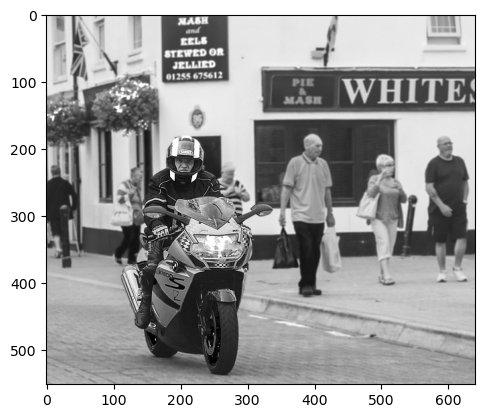

In [9]:
plt.imshow(gray_motorbike, cmap='gray')

In [11]:
noisy_motorbike = gray_motorbike.copy()
nrows, ncols = noisy_motorbike.shape

threshold = .9

saltpepper_array = np.random.rand(nrows,ncols)
for i in range(nrows):
    for j in range(ncols):
        if saltpepper_array[i,j] > threshold:     # Check if random value exceed threshold
            noisy_motorbike[i,j] = 1           # If so, add salt noise
        if saltpepper_array[i,j] < (1 - threshold):
            noisy_motorbike[i,j] = 0

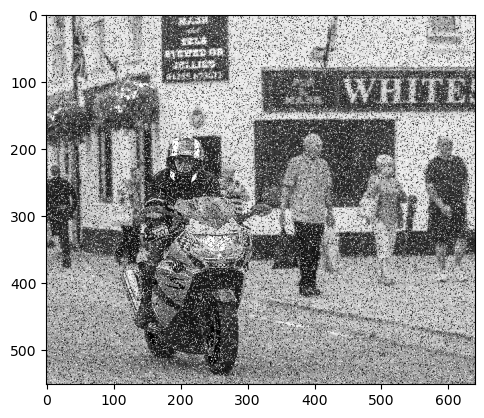

In [13]:
plt.imshow(noisy_motorbike,cmap='gray')

Let's go pixel-by-pixel, take a `3` by `3` slice centered on the pixel, and compute mean value.

For now, skip the first and last row, and first and column to avoid edge complications.

In [25]:
mean_filtered = noisy_motorbike.copy()

for i in range(1,nrows-1):
    for j in range(1,ncols-1):
        square = noisy_motorbike[i-1:i+2, j-1:j+2]
        mean = np.mean(square)
        
        mean_filtered[i,j] = mean

(-0.5, 639.5, 551.5, -0.5)

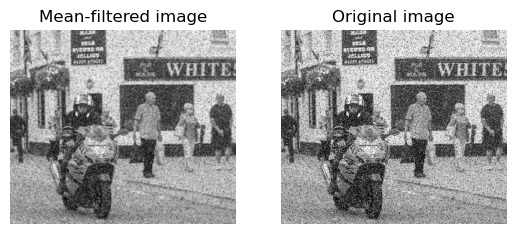

In [26]:
plt.subplot(1,2,1)
plt.imshow(mean_filtered,cmap='gray')
plt.title('Mean-filtered image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(noisy_motorbike,cmap='gray')
plt.title('Original image')
plt.axis('off')

Let's try the median filter:

In [27]:
median_filtered = noisy_motorbike.copy()

for i in range(1,nrows-1):
    for j in range(1,ncols-1):
        square = noisy_motorbike[i-1:i+2, j-1:j+2]
        median = np.median(square)
        
        median_filtered[i,j] = median

(-0.5, 639.5, 551.5, -0.5)

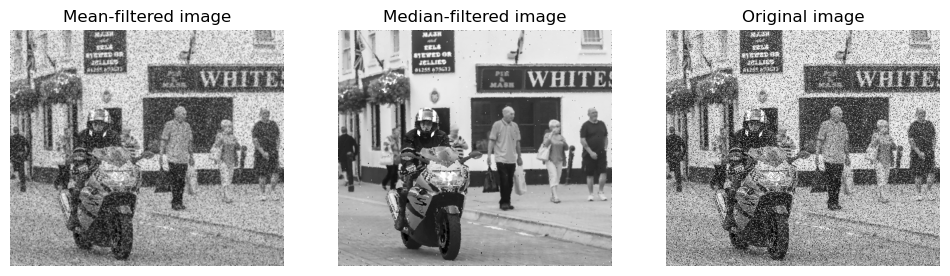

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(mean_filtered,cmap='gray')
plt.title('Mean-filtered image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(median_filtered,cmap='gray')
plt.title('Median-filtered image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(noisy_motorbike,cmap='gray')
plt.title('Original image')
plt.axis('off')

**Exercise:** Modify the code above to apply the mean/median filter using a `5` by `5` grid rather than `3` by `3`. For now, skip any edge rows/columns that are problematic.

**Exercise:** Modify the code to use an parameter `s` that controls the grid size. That is, we want to apply the mean/median filter using an `s` by `s` grid.